# 🔌 Relação entre Temperatura e Consumo de Energia Elétrica
# Análise exploratória e modelo de regressão linear com dados simulados (SP, RJ, BH)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
sns.set_theme(style="whitegrid")

# 📊 Simulação de Dados

In [4]:
date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
cities = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte']

In [5]:
def simulate_city_data(city, base_temp, base_consumption, amplitude_temp):
    np.random.seed(hash(city) % 1234567)
    days = len(date_range)
    temperature = base_temp + amplitude_temp * np.sin(2 * np.pi * date_range.dayofyear / 365) + np.random.normal(0, 1.5, days)
    consumption = base_consumption + (temperature - base_temp) * np.random.uniform(15, 30) + np.random.normal(0, 20, days)
    return pd.DataFrame({
        'date': date_range,
        'city': city,
        'temperature': temperature,
        'consumption': consumption
    })

In [6]:
df_sp = simulate_city_data('São Paulo', 22, 300, 5)
df_rj = simulate_city_data('Rio de Janeiro', 25, 320, 6)
df_bh = simulate_city_data('Belo Horizonte', 23, 310, 4)

In [9]:
df_all = pd.concat([df_sp, df_rj, df_bh], ignore_index=True)
df_all.head()

,date,city,temperature,consumption
0,2022-01-01,São Paulo,22.022975,305.930709
1,2022-01-02,São Paulo,23.886335,310.755062
2,2022-01-03,São Paulo,20.959189,292.638446
3,2022-01-04,São Paulo,20.771529,228.172823
4,2022-01-05,São Paulo,21.417890,259.408469


#Visualização de São Paulo

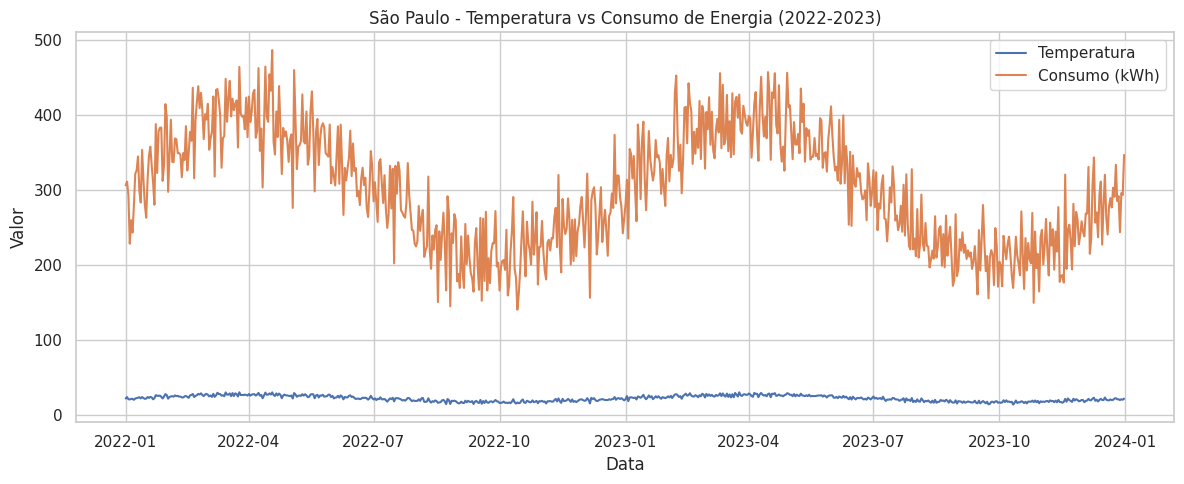

In [31]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_all[df_all['city'] == 'São Paulo'], x='date', y='temperature', label='Temperatura')
sns.lineplot(data=df_all[df_all['city'] == 'São Paulo'], x='date', y='consumption', label='Consumo (kWh)')
plt.title('São Paulo - Temperatura vs Consumo de Energia (2022-2023)')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.tight_layout()
plt.show()

#RJ

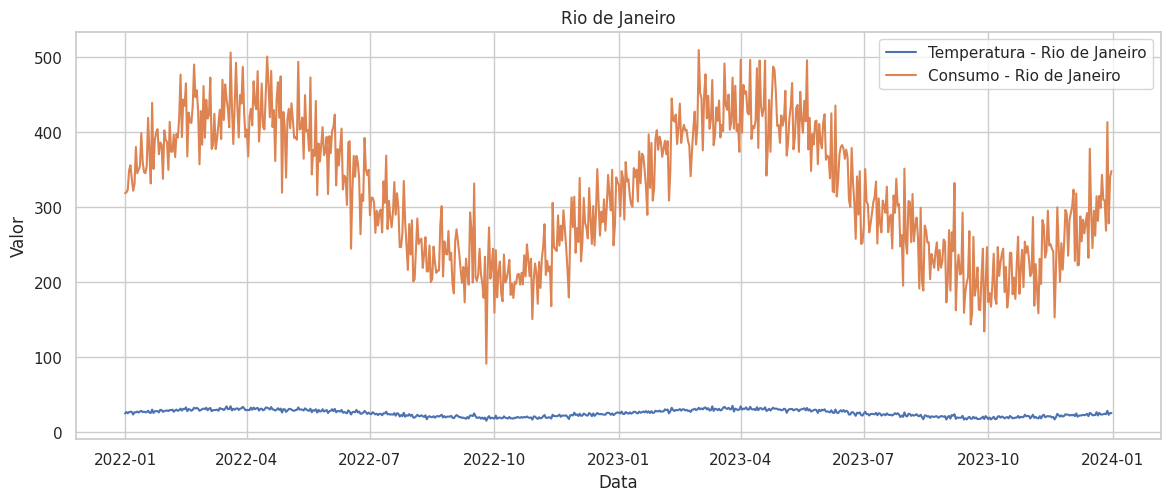

In [17]:

plt.figure(figsize=(14,18))
plt.subplot(3, 1, 2)
sns.lineplot(data=df_all[df_all['city'] == 'Rio de Janeiro'], x='date', y='temperature', label='Temperatura - Rio de Janeiro')
sns.lineplot(data=df_all[df_all['city'] == 'Rio de Janeiro'], x='date', y='consumption', label='Consumo - Rio de Janeiro')
plt.title("Rio de Janeiro")
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()

#BH

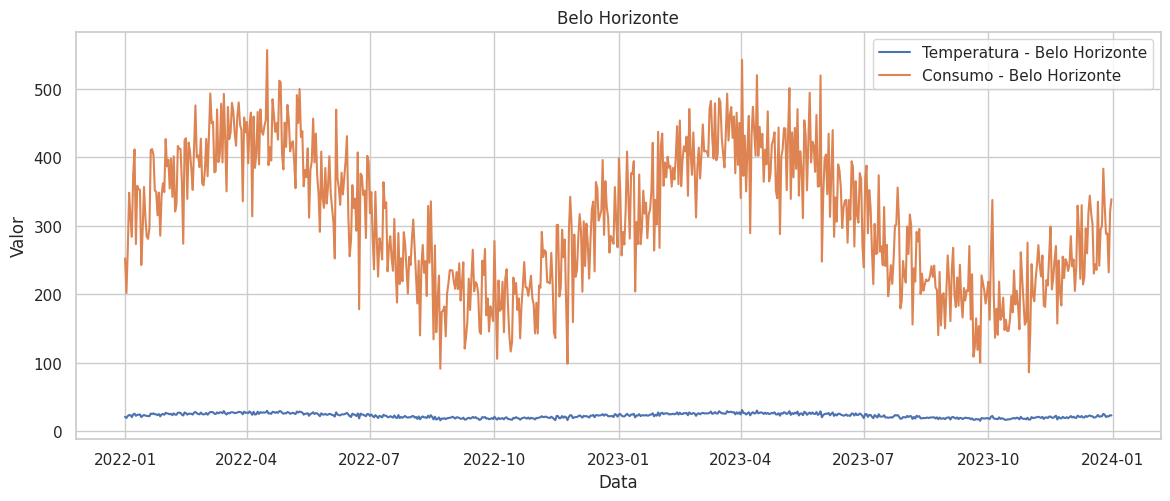

In [18]:
plt.figure(figsize=(14,18))
plt.subplot(3, 1, 3)
sns.lineplot(data=df_all[df_all['city'] == 'Belo Horizonte'], x='date', y='temperature', label='Temperatura - Belo Horizonte')
sns.lineplot(data=df_all[df_all['city'] == 'Belo Horizonte'], x='date', y='consumption', label='Consumo - Belo Horizonte')
plt.title("Belo Horizonte")
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()

#Correlação por cidade

In [32]:
correlations = df_all.groupby('city')[['temperature', 'consumption']].corr().iloc[0::2, -1].reset_index()
correlations = correlations.rename(columns={'consumption': 'correlation_temp_consumption'})
correlations[['city', 'correlation_temp_consumption']]

,city,correlation_temp_consumption
0,Belo Horizonte,0.980439
1,Rio de Janeiro,0.971932
2,São Paulo,0.962776


#Regressão Linear para São Paulo.

In [23]:
df_sp = df_all[df_all['city'] == 'São Paulo']
X = df_sp[['temperature']]
y = df_sp['consumption']

In [24]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [26]:
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

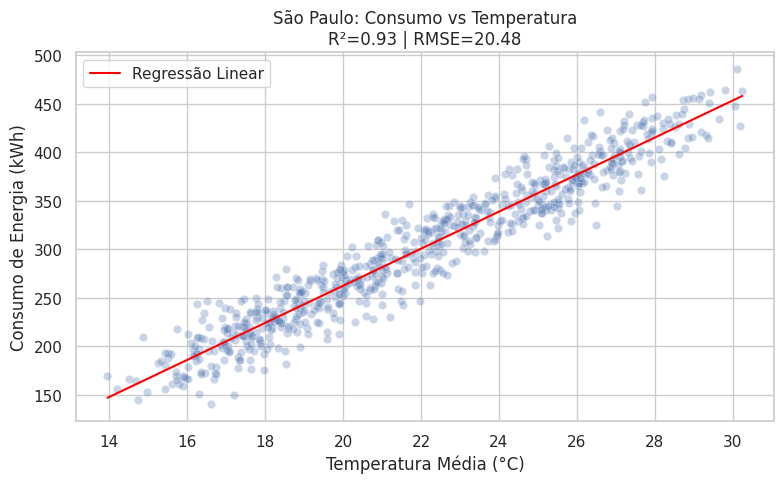

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temperature', y='consumption', data=df_sp, alpha=0.3)
sns.lineplot(x=df_sp['temperature'], y=y_pred, color='red', label='Regressão Linear')
plt.title(f'São Paulo: Consumo vs Temperatura\nR²={r2:.2f} | RMSE={rmse:.2f}')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Consumo de Energia (kWh)')
plt.tight_layout()
plt.show()

# Conclusão
- A correlação entre temperatura e consumo é alta em todas as cidades (> 0.97).
- O modelo de regressão linear explica bem a variação do consumo de energia com base na temperatura.
- O consumo cresce nos períodos mais quentes, o que indica maior uso de aparelhos como ar-condicionado.
- Esse modelo pode ser utilizado para prever sazonalidade e auxiliar no planejamento de energia.
